In [1]:
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
df = pd.read_csv('/content/drive/MyDrive/task7/segmentation data.csv')
df = df.iloc[:,1:]
df

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,0,0,67,2,124670,1,2
1,1,1,22,1,150773,1,2
2,0,0,49,1,89210,0,0
3,0,0,45,1,171565,1,1
4,0,0,53,1,149031,1,1
...,...,...,...,...,...,...,...
1995,1,0,47,1,123525,0,0
1996,1,1,27,1,117744,1,0
1997,0,0,31,0,86400,0,0
1998,1,1,24,1,97968,0,0


In [5]:
df.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


In [6]:
df.tail()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
1995,100001996,1,0,47,1,123525,0,0
1996,100001997,1,1,27,1,117744,1,0
1997,100001998,0,0,31,0,86400,0,0
1998,100001999,1,1,24,1,97968,0,0
1999,100002000,0,0,25,0,68416,0,0


In [7]:
df['Sex'] = df['Sex'].replace({0:'male',1:'female'})

df['Marital status'] = df['Marital status'].replace({0:'single',1:'non-single'})

df['Education'] = df['Education'].replace({0:'other / unknown',
                        1:'high school',
                        2:'university',
                        3:'graduate school'})

df['Occupation'] = df['Occupation'].replace({0:'unemployed / unskilled',
                            1:'skilled employee / official',
                            2:'management / self-employed / highly qualified employee / officer'})

df['Settlement size'] = df['Settlement size'].replace({0:'small city',
                                1:'mid-sized city',
                                2:'big city'})

In [8]:
df.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,male,single,67,university,124670,skilled employee / official,big city
1,100000002,female,non-single,22,high school,150773,skilled employee / official,big city
2,100000003,male,single,49,high school,89210,unemployed / unskilled,small city
3,100000004,male,single,45,high school,171565,skilled employee / official,mid-sized city
4,100000005,male,single,53,high school,149031,skilled employee / official,mid-sized city


In [9]:
df.shape

(2000, 8)

In [10]:
df.columns

Index(['ID', 'Sex', 'Marital status', 'Age', 'Education', 'Income',
       'Occupation', 'Settlement size'],
      dtype='object')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ID               2000 non-null   int64 
 1   Sex              2000 non-null   object
 2   Marital status   2000 non-null   object
 3   Age              2000 non-null   int64 
 4   Education        2000 non-null   object
 5   Income           2000 non-null   int64 
 6   Occupation       2000 non-null   object
 7   Settlement size  2000 non-null   object
dtypes: int64(3), object(5)
memory usage: 125.1+ KB


In [12]:
df.nunique()

ID                 2000
Sex                   2
Marital status        2
Age                  58
Education             4
Income             1982
Occupation            3
Settlement size       3
dtype: int64

In [13]:
df.isnull().sum()

ID                 0
Sex                0
Marital status     0
Age                0
Education          0
Income             0
Occupation         0
Settlement size    0
dtype: int64

In [14]:
df.describe()

,ID,Age,Income
count,2.000000e+03,2000.000000,2000.000000
mean,1.000010e+08,35.909000,120954.419000
std,5.774946e+02,11.719402,38108.824679
min,1.000000e+08,18.000000,35832.000000
25%,1.000005e+08,27.000000,97663.250000
50%,1.000010e+08,33.000000,115548.500000
75%,1.000015e+08,42.000000,138072.250000
max,1.000020e+08,76.000000,309364.000000


Text(35.909, 310, 'age mean = 35.91 years')

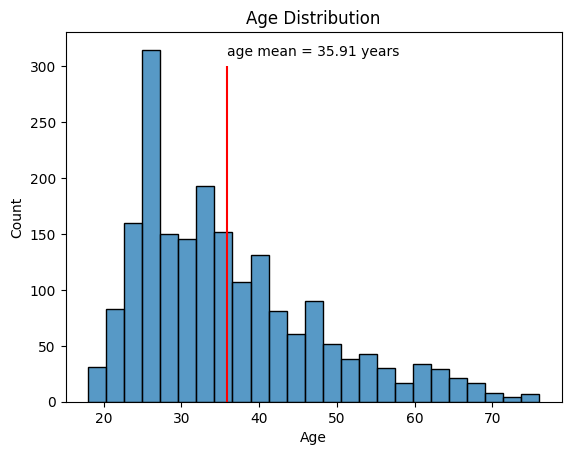

In [15]:
ax = sns.histplot(data = df, x = 'Age')
ax.set(title = 'Age Distribution')
plt.vlines(df.Age.mean(),0, 300, color = 'red')
plt.annotate('age mean = %.2f years' % df.Age.mean(), (df.Age.mean(), 310))

{'whiskers': [<matplotlib.lines.Line2D at 0x79a204016950>,
 'caps': [<matplotlib.lines.Line2D at 0x79a204016d70>,
 'boxes': [<matplotlib.lines.Line2D at 0x79a2040166b0>],
 'medians': [<matplotlib.lines.Line2D at 0x79a2040172b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x79a204017550>],
 'means': []}

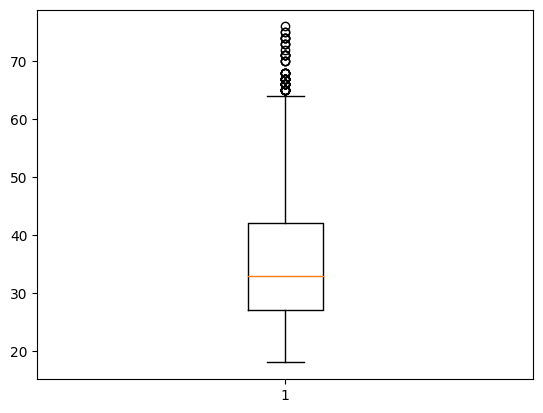

In [16]:
plt.boxplot(df["Age"])

<Axes: xlabel='Marital status', ylabel='count'>

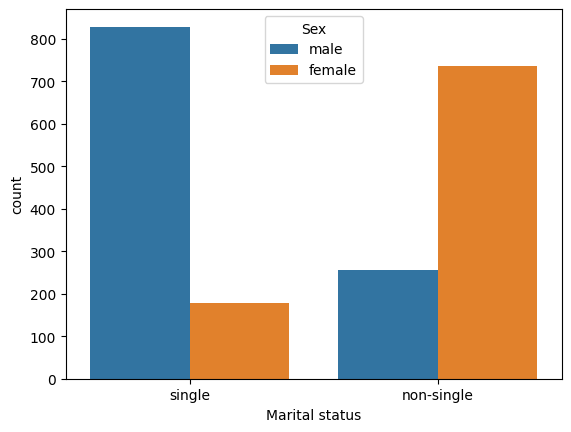

In [17]:
sns.countplot(df, x="Marital status", hue="Sex")

<Axes: xlabel='Education', ylabel='count'>

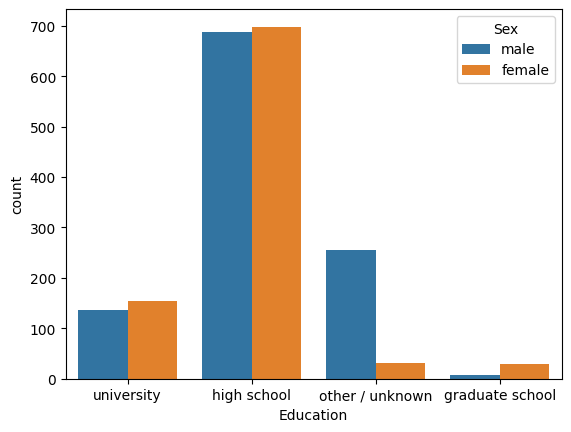

In [18]:
sns.countplot(df, x="Education", hue="Sex")

<Axes: xlabel='Education', ylabel='Age'>

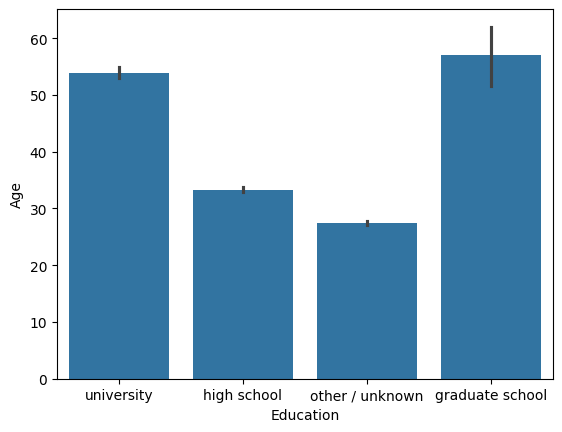

In [19]:
sns.barplot(data = df, x = 'Education', y = 'Age')

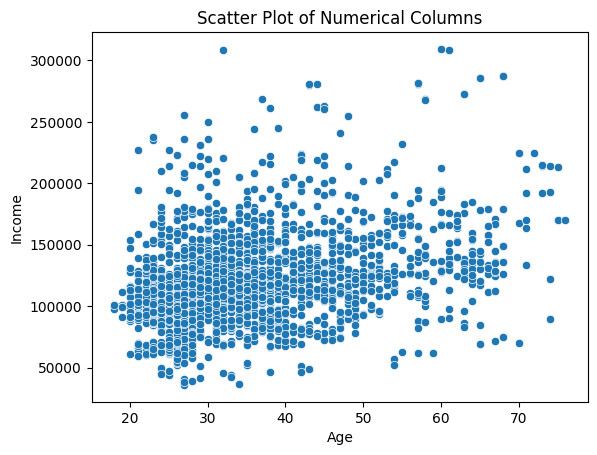

In [20]:
sns.scatterplot(x='Age', y='Income', data=df)
plt.title('Scatter Plot of Numerical Columns')
plt.xlabel('Age')
plt.ylabel('Income')
plt.show()

<ipython-input-21-2570a868d609>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


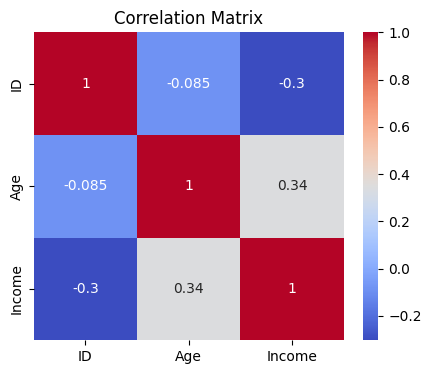

In [21]:
correlation_matrix = df.corr()
plt.figure(figsize=(5,4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [22]:
new_df = df['Education'].value_counts().rename_axis('Study').reset_index(name='counts')
new_df.head(4)

,Study,counts
0,high school,1386
1,university,291
2,other / unknown,287
3,graduate school,36


In [23]:
your_labels = new_df.Study
your_values = new_df.counts

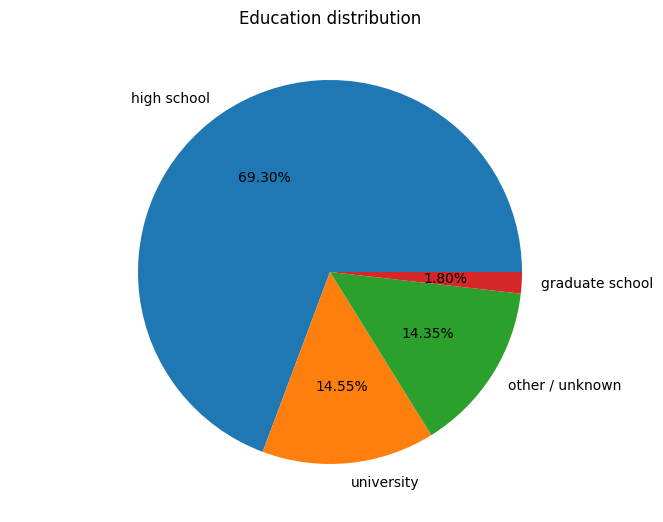

In [24]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
ax.pie(your_values, labels = your_labels, autopct='%1.2f%%')
plt.title("Education distribution")
plt.show()

In [72]:
from sklearn.cluster import KMeans

In [71]:
# Feature scaling
#scaler = StandardScaler()
#scaled_features = scaler.fit_transform(df[['Age', 'Income']])

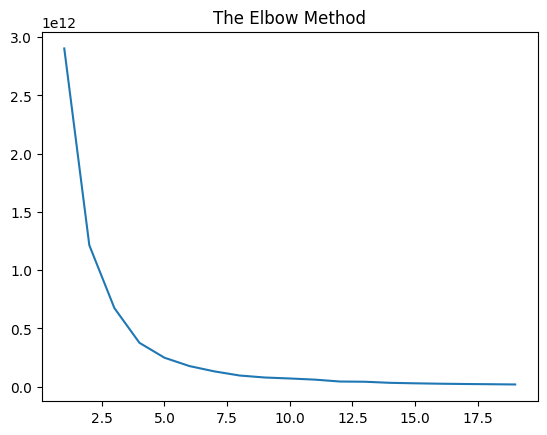

In [73]:
clusters = range(1,20)
inertias = []
for n in clusters:
    kmeans = KMeans(n_init = 1, n_clusters = n)
    fitted_model = kmeans.fit(df)
    inertias.append(fitted_model.inertia_)

ax = sns.lineplot(x = range(1,20), y = inertias)
ax.set_title('The Elbow Method')
plt.show()

In [74]:
# Based on the elbow curve, let's choose K=3

# K-Means clustering with K=3
kmeans = KMeans(n_clusters=3)
kmeans.fit(scaled_features)
df['Cluster'] = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


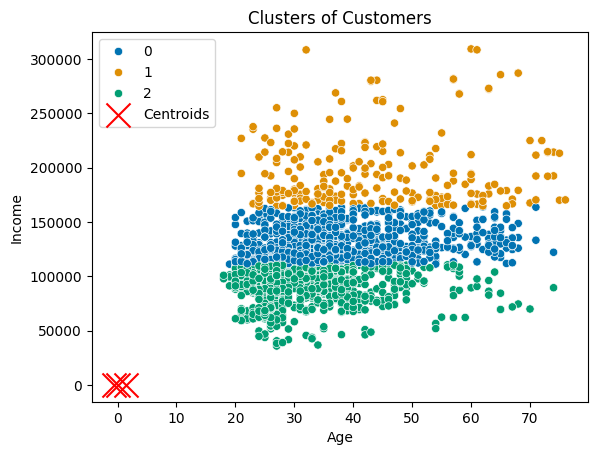

In [76]:
sns.scatterplot(data=df, x='Age', y='Income', hue='cluster', palette='colorblind')

# Plotting the centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=300, c='red', marker='x', label='Centroids')
plt.title('Clusters of Customers')
plt.xlabel('Age')
plt.ylabel('Income')
plt.legend()
plt.show()

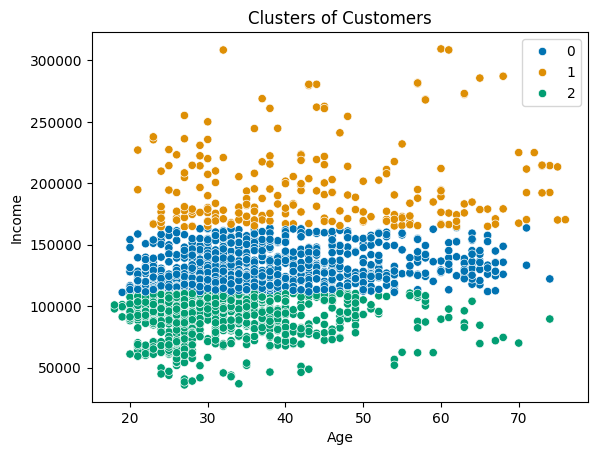

In [78]:
df['cluster'] = labels
sns.scatterplot(data = df, x = 'Age', y = 'Income', hue = 'cluster', palette='colorblind')
plt.title('Clusters of Customers')
plt.xlabel('Age')
plt.ylabel('Income')
plt.legend()
plt.show()

In [86]:
!pip install scikit-learn-extra

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 22.7 MB/s eta 0:00:00


In [87]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import pairwise_distances
from sklearn_extra.cluster import KMedoids

In [91]:
features = ['Age', 'Income']
distortions = []
K_range = range(1, 6)
for k in K_range:
    kmedoids = KMedoids(n_clusters=k, random_state=0)
    kmedoids.fit(df[features])
    distortions.append(kmedoids.inertia_)

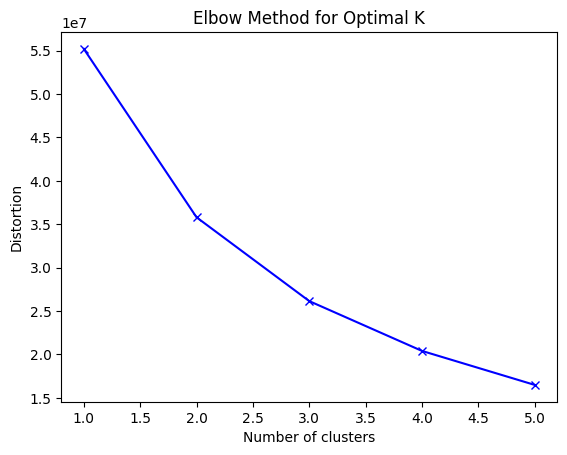

In [92]:
plt.plot(K_range, distortions, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.title('Elbow Method for Optimal K')
plt.show()

In [93]:
# Choosing K and performing clustering
optimal_k = 3  # Selected based on elbow method
kmedoids = KMedoids(n_clusters=optimal_k, random_state=0)
kmedoids.fit(df[features])

KMedoids(n_clusters=3, random_state=0)

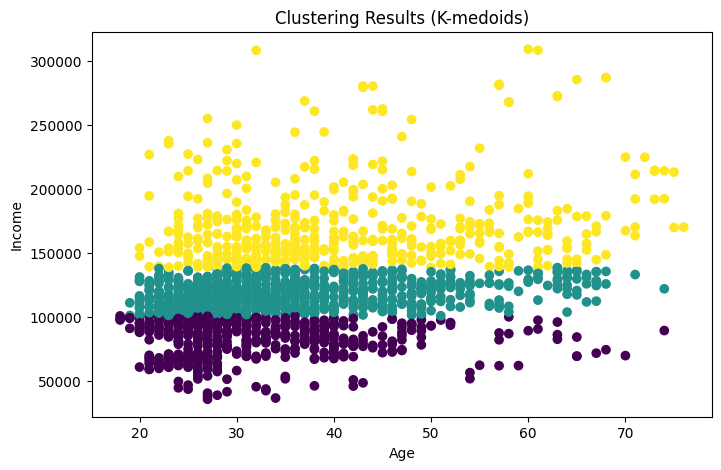

In [96]:
plt.figure(figsize=(8, 5))
plt.scatter(df['Age'], df['Income'], c=kmedoids.labels_, cmap='viridis')
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Clustering Results (K-medoids)')
plt.show()